# Task 0: Import libraries and datasets

In [1]:
import pandas as pd

In [2]:
fpt_df = pd.read_csv('data/FPT.csv')
fpt_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [3]:
msn_df = pd.read_csv('data/MSN.csv')
msn_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [4]:
pnj_df = pd.read_csv('data/PNJ.csv')
pnj_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [5]:
vic_df = pd.read_csv('data/VIC.csv')
vic_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


# Task 1. Data preprocessing

In [6]:
fpt_df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [7]:
fpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


Check null values:

In [8]:
nan_values = fpt_df.isna()
nan_columns = nan_values.any()
nan_columns

Ticker           False
Date/Time        False
Open             False
High             False
Low              False
Close            False
Volume           False
Open Interest    False
dtype: bool

So glad we don't have any null values in our dataset.

# Task 2. Data visualisation

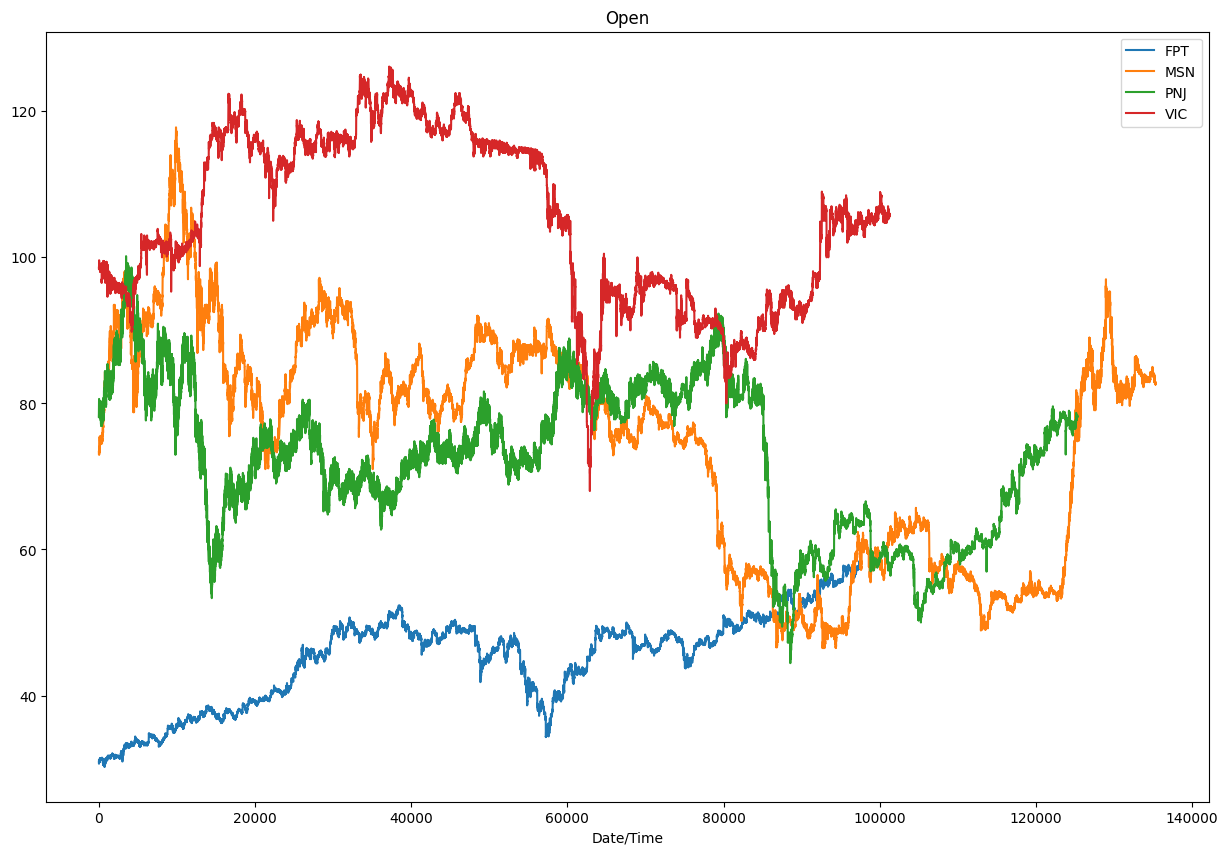

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(fpt_df['Open'], label="FPT")
ax.plot(msn_df['Open'], label='MSN')
ax.plot(pnj_df['Open'], label='PNJ')
ax.plot(vic_df['Open'], label='VIC')
ax.set_xlabel('Date/Time')
ax.set_title('Open')
plt.legend()

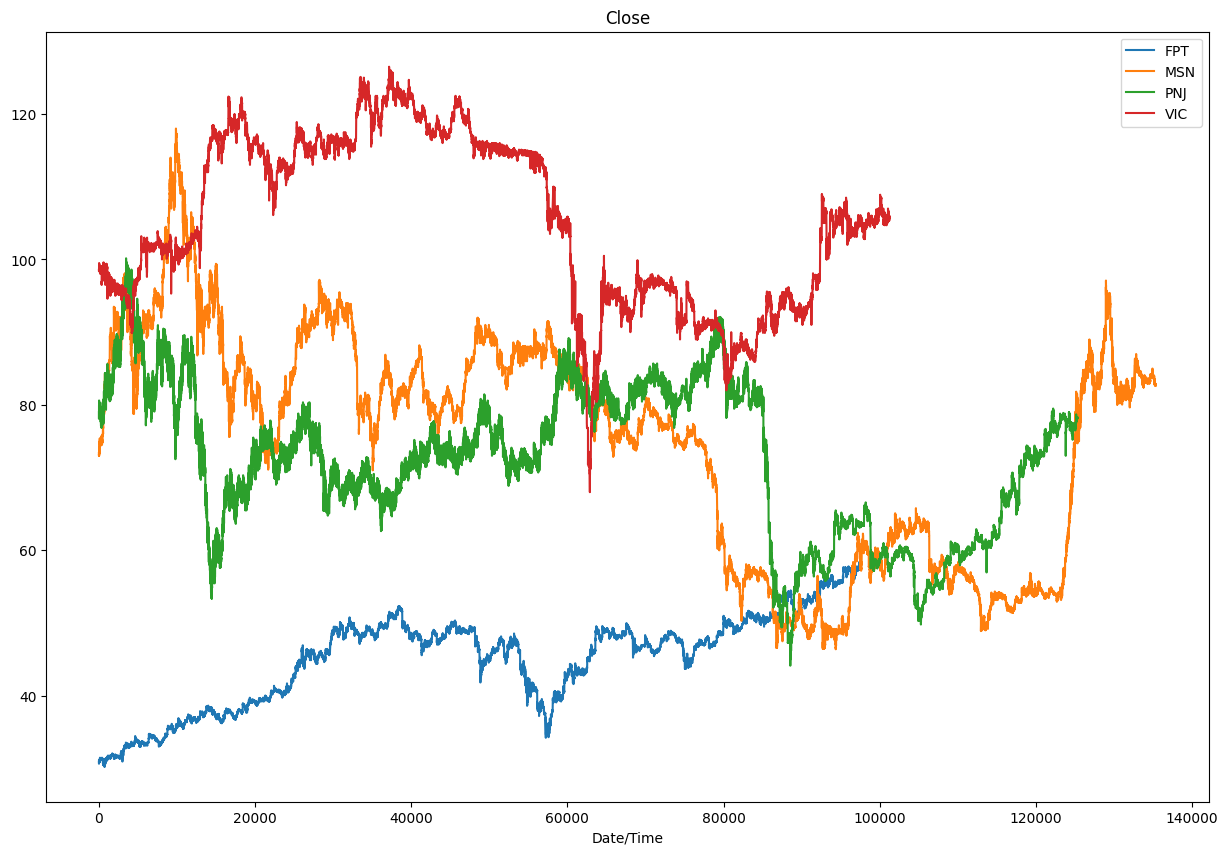

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(fpt_df['Close'], label="FPT")
ax.plot(msn_df['Close'], label='MSN')
ax.plot(pnj_df['Close'], label='PNJ')
ax.plot(vic_df['Close'], label='VIC')
ax.set_xlabel('Date/Time')
ax.set_title('Close')
plt.legend()

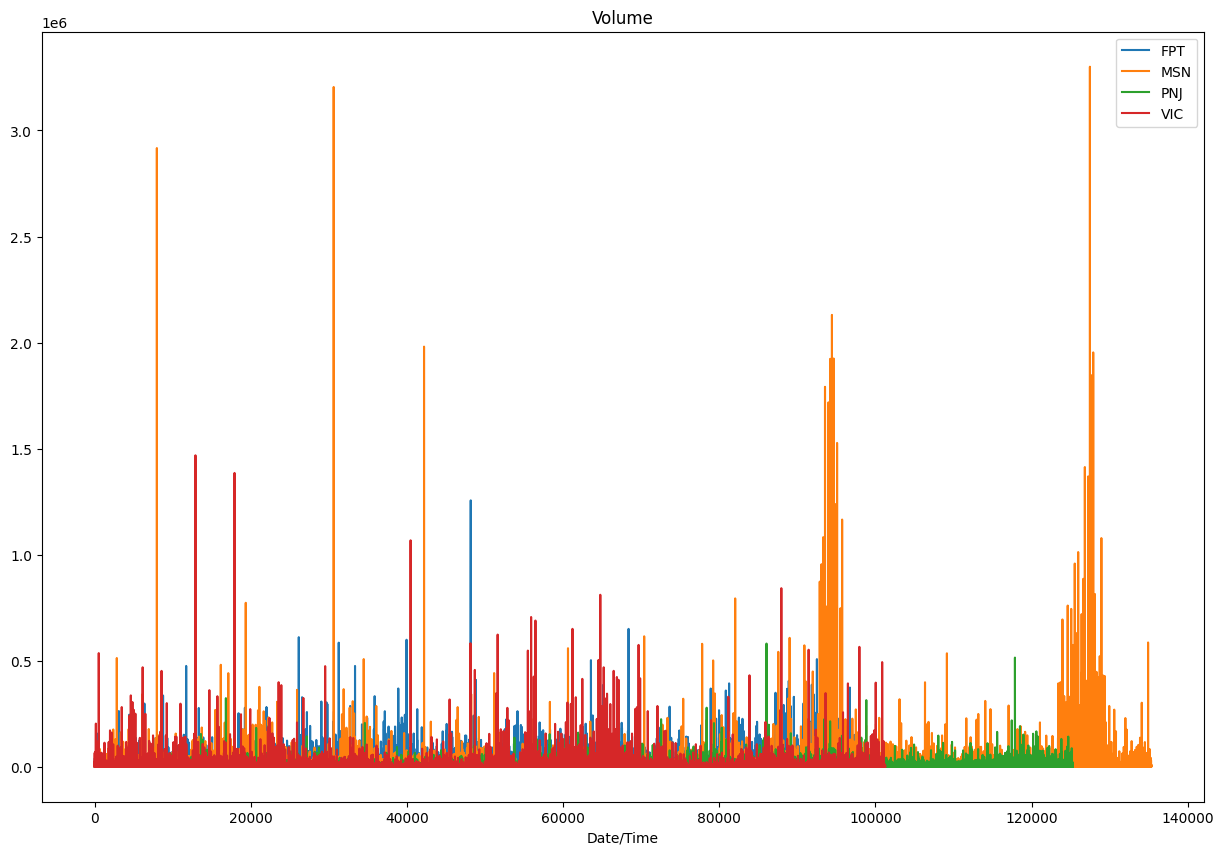

In [11]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(fpt_df['Volume'], label="FPT")
ax.plot(msn_df['Volume'], label='MSN')
ax.plot(pnj_df['Volume'], label='PNJ')
ax.plot(vic_df['Volume'], label='VIC')
ax.set_xlabel('Date/Time')
ax.set_title('Volume')
plt.legend()

Based on the chart, we gonna use the MSN stock data to predict the stock price.

# Task 3. Predict stock price based on the MSN stock data.

In [12]:
msn_df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0
...,...,...,...,...,...,...,...,...
135349,MSN,12/22/2020 14:23,82.8,82.8,82.8,82.8,700,0
135350,MSN,12/22/2020 14:24,82.7,82.8,82.7,82.8,4660,0
135351,MSN,12/22/2020 14:25,82.8,82.8,82.8,82.8,50,0
135352,MSN,12/22/2020 14:27,82.8,82.8,82.8,82.8,300,0


In [13]:
train = msn_df.iloc[:, 2:3].values
train

array([[73.1],
       [73. ],
       [73.5],
       ...,
       [82.8],
       [82.8],
       [82.8]])

In [14]:
train.shape

(135354, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(train)

In [16]:
scaled

array([[0.37307153],
       [0.371669  ],
       [0.37868163],
       ...,
       [0.50911641],
       [0.50911641],
       [0.50911641]])

In [17]:
import numpy as np

X_train = []
y_train = []

for i in range(60, 108283):
    X_train.append(scaled[i-60:i, 0])
    y_train.append(scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape

(108223, 60)

In [19]:
y_train.shape

(108223,)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(108223, 60, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()
# 3 LSTM layers append and return sequence
model.add(LSTM(units=512, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=512, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=512, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.2))

# Make it go through the dense layer
model.add(Dense(units=512))

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1, batch_size=42)

2577/2577 [==============================] - 5418s 2s/step - loss: 0.0017


In [61]:
test_df = pd.read_csv('data/MSN_test.csv')
actual_price = test_df.iloc[:, 2:3].values

In [ ]:
dataset_total = pd.concat((train['Open'], test_df['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = [inputs[i-60:i,0] for i in range(60, 108283)]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predict = model.predict(X_test)
predict = scaler.inverse_transform(predict)
predict

In [ ]:
plt.plot(actual_price, color='red', label='Actual')
plt.plot(predict, color='red', label='Actual')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()